<div style="background-color:#000047; padding: 30px; border-radius: 10px; color: white; text-align: center;">
    <img src='Figures/alinco.png' style="height: 100px; margin-bottom: 10px;"/>
    <h1>Regresion Lineal, Multiple y Polinomial</h1>
</div>


## Regresión Lineal
Consideremos un polinomio de grado uno:

$$y = \beta_1 x + \beta_0.$$

Esta es una **línea recta** que tiene pendiente $\beta_1$. Sabemos que habrá una línea conectando dos puntos cualesquiera. Por tanto, *una ecuación polinómica de primer grado es un ajuste perfecto entre dos puntos*.

Si consideramos ahora un polinomio de segundo grado,

$$y = \beta_2 x^2 + \beta_1 x + \beta_0,$$

este se ajustará exactamente a tres puntos. Si aumentamos el grado de la función a la de un polinomio de tercer grado, obtenemos:

$$y = \beta_3 x^3 + \beta_2 x^2 + \beta_1 x + \beta_0,$$

que se ajustará a cuatro puntos.

**Ejemplos**
1. Encontrar la línea recta que pasa exactamente por los puntos $(0,1)$ y $(1,0)$.
2. Encontrar la parábola que pasa exactamente por los puntos $(-1,1)$, $(0,0)$ y $(1,1)$.

**Solución**
1. Consideramos $y=\beta_1 x + \beta_0$. Evaluando en el punto $(0,1)$, obtenemos $\beta_1(0) + \beta_0 = 1$. Ahora, evaluando en el punto $(1,0)$, obtenemos $\beta_1(1) + \beta_0 = 0$. De esta manera,
$$\left[\begin{array}{cc} 1 & 0 \\ 1 & 1\end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1\end{array}\right]=\left[\begin{array}{c} 1 \\ 0\end{array}\right].$$
Resolviendo, $\beta_0=-\beta_1=1$.

2. Consideramos $y=\beta_2 x^2 + \beta_1 x + \beta_0$. Evaluando en el punto $(-1,1)$, obtenemos $\beta_2(-1)^2 + \beta_1(-1) + \beta_0 = 1$. Ahora, evaluando en el punto $(0,0)$, obtenemos $\beta_2(0)^2 + \beta_1(0) + \beta_0 = 0$. Finalmente, evaluando en el punto $(1,1)$, obtenemos $\beta_2(1)^2 + \beta_1(1) + \beta_0 = 1$. De esta manera,
$$\left[\begin{array}{ccc} 1 & -1 & 1 \\ 1 & 0 & 0 \\ 1 & 1 & 1 \end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \\ \beta_2 \end{array}\right]=\left[\begin{array}{c} 1 \\ 0 \\ 1 \end{array}\right].$$
Resolviendo, $\beta_0=\beta_1=0$ y $\beta_2=1$.

### ¿Qué tienen en común los anteriores problemas?
Las curvas están completamente determinadas por los puntos (datos limpios, suficientes y necesarios).

Esto se traduce en que, al llevar el problema a un sistema de ecuaciones lineales, existe una única solución: **no hay necesidad, ni se puede optimizar nada**.

La realidad es que los datos que encontraremos en nuestra vida profesional se parecen más a esto...

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import random

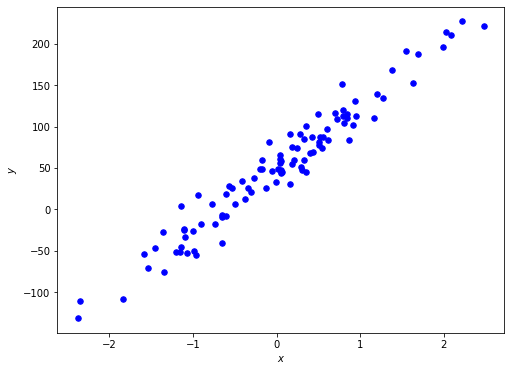

In [2]:
from sklearn import datasets
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4, bias=50)

plt.figure(figsize=(8,6))
plt.scatter(X[:,0],y, color='b', marker='o', s=30)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

### ¿Cómo ajustamos una curva a esto?

Consideramos entonces ajustes de la forma 

$$\hat{f}(x) = \beta_0+\beta_1 x = \left[1 \quad x\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \end{array}\right]=\left[1 \quad x\right]\boldsymbol{\beta}$$ (lineas rectas).


Para decir '*mejor*', tenemos que definir algún sentido en que una recta se ajuste *mejor* que otra.

> El objetivo es seleccionar los coeficientes $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$, de forma que la función evaluada en los puntos $x_i$ ($\hat{f}(x_i)$) aproxime los valores correspondientes $y_i$.

> El objetivo es encontrar los $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$ que minimiza El error cuadrático medio (MSE):
$$\frac{1}{2n}\sum_{i=1}^{n}(y_i-\hat{f}(x_i))^2=\frac{1}{2n}\sum_{i=1}^{n}(y_i-(\beta_0+ \beta_1x_i))^2=\frac{1}{2n}\sum_{i=1}^{n}(y_i-\left[1 \quad x_i\right]\boldsymbol{\beta})^2=\frac{1}{2n}\left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2,$$

donde $\boldsymbol{y}=\left[y_1\quad\dots\quad y_n\right]^T$, y $\boldsymbol{X}=\left[\begin{array}{ccc}1 & x_1\\ \vdots & \vdots \\ 1 & x_n\end{array}\right].$ 

## Gradiente Descendente

Partiendo del **MSE**:

$$ J(\beta) = \frac{1}{2m}\sum_{i=1}^m (\hat{y}(x_i) - y_i)^2$$  

$\beta = [\beta_0, \beta_1]$


El algoritmo de gradiente descendente es un método de optimización local en el que, en cada paso, empleamos el gradiente negativo como dirección de descenso. 

$$\boldsymbol{\beta}_{k} = \boldsymbol{\beta}_{k-1}-\alpha \nabla J(\boldsymbol{\beta}_{k-1})$$

Para una regresión lineal tendríamos que las ecuaciones del algoritmo de gradiente descendente son:


$$ \nabla J(\boldsymbol{\beta}) = \left[\begin{array}{c} \frac{1}{m} \sum_{i=1}^m (\hat{y}(x_i) - y_i) \\ 
\frac{1}{m} \sum_{i=1}^m (\hat{y}(x_i) - y_i)x_i\end{array}\right].$$


$$ \beta_0 = \beta_0 - \alpha \frac{1}{m} \sum_{i=1}^m (\hat{y}(x_i) - y_i)$$

$$ \beta_1 = \beta_1 - \alpha \frac{1}{m} \sum_{i=1}^m (\hat{y}(x_i) - y_i)x_i$$

<img alt="Datos categóricos con Python" title="GradientDescendt" src="https://cdn-images-1.medium.com/max/1600/0*fU8XFt-NCMZGAWND." high=300px, width=300px>



## Linear Regression Class

In [3]:
class LinearRegression:
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.mse_hist= None
    
    def fit(self, X, y):
        self.mse_hist = []
        n_samples, n_features = X.shape
        self.weights = np.random.randn(n_features,1)/np.sqrt(n_samples)
        self.bias = 0
        
        #Algoritmo de gradiente descendente
        for k in range(self.n_iters):
            y_pred = np.dot(X,self.weights) + self.bias # yhat = X*beta
            dw = (1/n_samples)*np.dot(X.T, (y_pred - y)) #derivada parcial de betas (beta1,beta2,..,betan)
            db = (1/n_samples)*np.sum(y_pred - y) #derivada parcial del bias (beta_0)
            
            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db
            
            self.mse_hist.append(self.mse(X,y))
            
    def mse(self,X,y):
        return np.mean((y-self.predict(X))**2)
    
    def predict(self,X):
        y_pred = np.dot(X,self.weights) + self.bias # yhat = X*beta
        return y_pred
    
    def get_coef(self):
        return self.weights
    
    def get_bias(self):
        return self.bias
    
    def get_mse_hist(self):
        return self.mse_hist

In [4]:
X.shape, y.shape

((100, 1), (100,))

## Train-Test-Split

In [5]:
import random

In [6]:
def train_test_split(X_df, y_df, test_size):
    if isinstance(test_size, float):
        test_size=round(test_size*len(X_df))
    
    ind = X_df.index.to_list()
    test_indices = random.sample(population=ind, k = test_size)
    
    X_test_df = X_df.loc[test_indices]
    X_train_df = X_df.drop(test_indices)
    
    y_test_df = y_df.loc[test_indices]
    y_train_df = y_df.drop(test_indices)
    
    return X_train_df, X_test_df, y_train_df, y_test_df


In [7]:
random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(X), pd.DataFrame(y), 0.2)

In [8]:
X_train.shape, y_train.shape

((80, 1), (80, 1))

In [9]:
X_test.shape, y_test.shape

((20, 1), (20, 1))

In [10]:
#Entrenar un modelo de regresion Lineal utilizando nuestra librería
modelo_reg = LinearRegression()


In [11]:
#Entrenar el modelo
modelo_reg.fit(X_train.values, y_train.values)

In [12]:
modelo_reg.get_coef() #Beta1

array([[75.41270973]])

In [13]:
modelo_reg.get_bias() #beta0

49.239551398772896

$$ \hat{y}(x) = 49.036 + 74.58*x$$

In [14]:
y_pred_train = modelo_reg.predict(X_train.values)


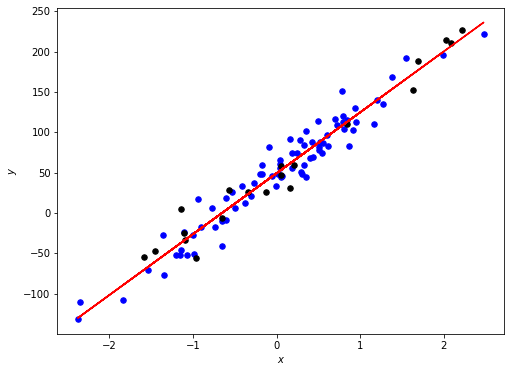

In [19]:
plt.figure(figsize=(8,6))
plt.scatter(X_train.values[:,0], y_train.values, color = 'b', marker='o', s=30)
plt.scatter(X_test.values[:,0], y_test.values, color = 'k', marker='o', s=30)
plt.plot(X_train.values[:,0],y_pred_train, color = 'r')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

In [21]:
modelo_reg.get_mse_hist()

[7326.305615792296,
 7200.780479919369,
 7077.5201536333025,
 6956.483314865274,
 6837.629403652492,
 6720.918607938622,
 6606.311849641303,
 6493.770770981668,
 6383.257721070902,
 6274.7357427489715,
 6168.168559670723,
 6063.520563634693,
 5960.756802149983,
 5859.842966236751,
 5760.745378455817,
 5663.430981163108,
 5567.867324984637,
 5474.022557507861,
 5381.865412185328,
 5291.365197446549,
 5202.491786014217,
 5115.215604420851,
 5029.507622722094,
 4945.339344402946,
 4862.682796473271,
 4781.510519749005,
 4701.795559315545,
 4623.511455169884,
 4546.632233038099,
 4471.132395364885,
 4396.986912471889,
 4324.171213881623,
 4252.661179803873,
 4182.433132781499,
 4113.463829492619,
 4045.7304527062397,
 3979.210603388418,
 3913.882292956116,
 3849.7239356759746,
 3786.714341205242,
 3724.8327072721986,
 3664.058612493437,
 3604.372009325416,
 3545.753217147746,
 3488.1829154757374,
 3431.6421372997675,
 3376.1122625490634,
 3321.575011677573,
 3268.012439369612,
 3215.406928

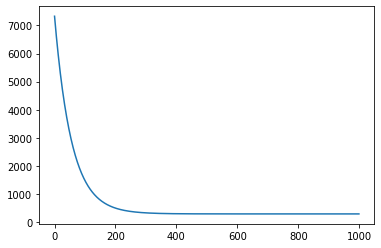

In [23]:
plt.plot(modelo_reg.get_mse_hist());

### Ejemplo 1:

In [24]:
# Cargar de la Librería LinearRegression
from HAIA import LinearRegression as LR

In [26]:
datos = pd.read_csv('Data/Position_Salaries.csv')
datos.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [28]:
X = datos[['Level']]
y = datos[['Salary']]

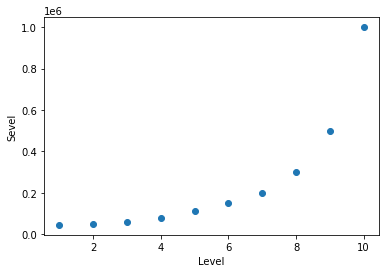

In [29]:
plt.figure(figsize=(6,4))
plt.scatter(X.values, y.values)
plt.xlabel('Level')
plt.ylabel('Sevel')
plt.show()

In [30]:
# Aplicar un Modelo de regresión Lineal

#1.- Instanciar un Objeto de la clase LR
reg_model = LR(lr=0.001, n_iters=2000)


In [31]:
#Entrenamiento del modeloreg_model = LinearRegression()
reg_model.fit(X.values, y.values)

In [33]:
reg_model.get_coef(), reg_model.get_bias()

(array([[61741.86574765]]), -62105.48076634659)

In [34]:
#2.- Predecir los valores de x
ypred = reg_model.predict(X.values)
ypred

array([[-3.63615019e+02],
       [ 6.13782507e+04],
       [ 1.23120116e+05],
       [ 1.84861982e+05],
       [ 2.46603848e+05],
       [ 3.08345714e+05],
       [ 3.70087579e+05],
       [ 4.31829445e+05],
       [ 4.93571311e+05],
       [ 5.55313177e+05]])

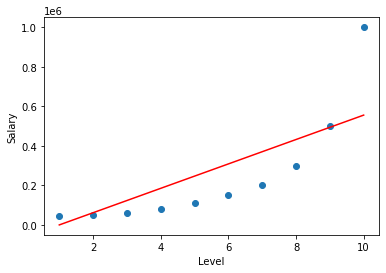

In [40]:
#3.- Graficar el modelo con los datos
plt.figure(figsize=(6,4))
plt.scatter(X.values, y.values)
plt.plot(X.values, ypred, 'r')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()


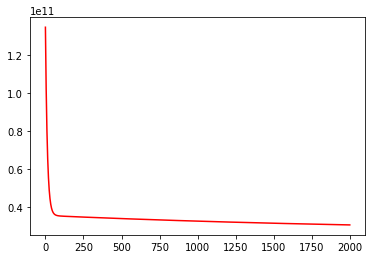

In [38]:
#4.- Evaluar el modelo : 
plt.plot(reg_model.get_mse_hist(), 'r');



## Regression Polinomial 

Ahora, la ecuación para la Regresión Polinomial será la siguiente:

$$y =  \beta_0 + \beta_1 x + \beta_2 x^2 + ... + \beta_n x^n$$


In [41]:
from sklearn.preprocessing import PolynomialFeatures

In [48]:
poly = PolynomialFeatures(degree= 2, include_bias=False)

In [49]:
X_poly = poly.fit_transform(X)
X_poly

array([[  1.,   1.],
       [  2.,   4.],
       [  3.,   9.],
       [  4.,  16.],
       [  5.,  25.],
       [  6.,  36.],
       [  7.,  49.],
       [  8.,  64.],
       [  9.,  81.],
       [ 10., 100.]])

In [52]:
y.values

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

In [53]:
#Aplicar el modelo de reg Lineal con grado 2
reg_model2 = LR(n_iters=10000, lr = 0.0001)
#Entrenar el modelo
reg_model2.fit(X_poly, y.values)

In [54]:
reg_model2.get_coef()

array([[-39965.98527218],
       [ 11844.64921174]])

In [56]:
reg_model2.get_bias()

1398.6217206298325

$$ \hat{y}(x) =1398.6  -39965.98*x + 11844.649*x^2$$

In [57]:
#predecir el modelo
ypred_poly2 = reg_model2.predict(X_poly)
ypred_poly2

array([[-26722.71433981],
       [-31154.75197675],
       [-11897.49119022],
       [ 31049.06801981],
       [ 97684.92565332],
       [188010.08171032],
       [302024.53619081],
       [439728.28909478],
       [601121.34042224],
       [786203.69017319]])

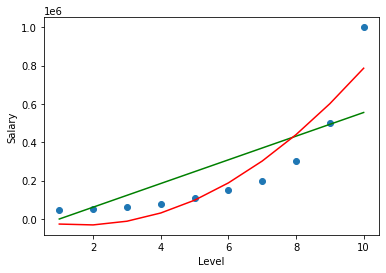

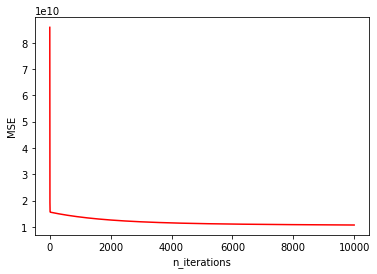

In [59]:
#3.- Graficar el modelo con los datos
plt.figure(figsize=(6,4))
plt.scatter(X.values, y.values)
plt.plot(X.values, ypred, 'g')
plt.plot(X.values, ypred_poly2, 'r')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

#Obtener historial de la minimización del error

plt.figure(figsize=(6,4))
plt.plot(reg_model2.get_mse_hist(),'r')
plt.xlabel('n_iterations')
plt.ylabel('MSE')
plt.show()

## Regression Multiple 

$$y =  \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n$$


In [62]:
house = pd.read_csv('Data/USA_housing.csv')
house.head(3)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."


In [63]:
from HAIA import HyAIA as hy

In [64]:
house = hy(house)

In [65]:
house.get_dqr()

,Columns_Names,Dtypes,Present_values,Missing_values,Unique_values,Max_values,Min_values,Mean_values,Is_Categorical
Avg. Area Income,Avg. Area Income,float64,5000,0,5000,107701.748378,17796.63119,68583.108984,False
Avg. Area House Age,Avg. Area House Age,float64,5000,0,5000,9.519088,2.644304,5.977222,False
Avg. Area Number of Rooms,Avg. Area Number of Rooms,float64,5000,0,5000,10.759588,3.236194,6.987792,False
Avg. Area Number of Bedrooms,Avg. Area Number of Bedrooms,float64,5000,0,255,6.5,2.0,3.98133,False
Area Population,Area Population,float64,5000,0,5000,69621.713378,172.610686,36163.516039,False
Price,Price,float64,5000,0,5000,2469065.594175,15938.657923,1232072.654142,False
Address,Address,object,5000,0,5000,Unit 9871 Box 9037\nDPO AP 37275-9289,"000 Adkins Crescent\nSouth Teresa, AS 49642-1348",N/A,True


In [68]:
house.data.drop('Address', axis=1, inplace=True)

In [70]:
house.data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [ ]:
# Estandarizar
# xstd = (x - x.mean() )/x.std

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
std = StandardScaler()

In [73]:
X_std = std.fit_transform(house.data.iloc[:,:5])
X_std

array([[ 1.02865969, -0.29692705,  0.02127433,  0.08806222, -1.31759867],
       [ 1.00080775,  0.02590164, -0.25550611, -0.72230146,  0.40399945],
       [-0.68462916, -0.11230283,  1.5162435 ,  0.93084045,  0.07240989],
       ...,
       [-0.48723454,  1.28447022, -2.17026949, -1.50025059, -0.29193658],
       [-0.05459152, -0.44669439,  0.14154061,  1.18205319,  0.65111608],
       [-0.28831272,  0.01521477, -0.19434166,  0.07185495,  1.04162464]])

In [74]:
X_std.shape

(5000, 5)

In [77]:
y = house.data.iloc[:,5].values.reshape(len(y),1)
y

array([[1059033.55787012],
       [1505890.91484695],
       [1058987.98787608],
       ...,
       [1030729.58315229],
       [1198656.87240769],
       [1298950.48026696]])

In [78]:
X_std.shape, y.shape

((5000, 5), (5000, 1))

In [79]:
#Aplicar el modelo de regresion multinomial (5 variables)
reg_model_house = LR(n_iters = 1000, lr=0.01)
#Entrenamiento
reg_model_house.fit(X_std, y)

In [81]:
house.data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

$$ \hat{y}(x_1,x_2,x_3,x_4,x_5) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3  + \beta_4 x_4 +  \beta_5 x_5$$

In [80]:
reg_model_house.get_coef()

array([[229924.68245369],
       [164186.90965201],
       [121045.65750057],
       [  2343.68915369],
       [150867.03449416]])

In [82]:
reg_model_house.get_bias()

1232019.4640289764

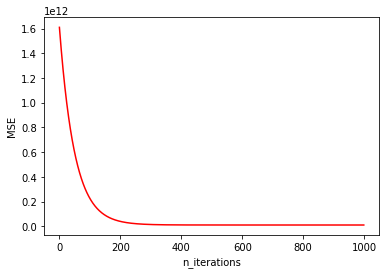

In [83]:
#Obtener el error del modelo
plt.figure(figsize=(6,4))
plt.plot(reg_model_house.get_mse_hist(),'r')
plt.xlabel('n_iterations')
plt.ylabel('MSE')
plt.show()

In [84]:
house.data.head(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [85]:
# Hacer una predicción de una nueva entrada
X_new = np.array([[64856.2, 7, 5, 3, 30000.5]]) #Datos de entrada sin estandarizar
X_new_std = std.transform(X_new)

y_pred_new = reg_model_house.predict(X_new_std)
y_pred_new

array([[986210.35607807]])

In [86]:
# Hacer una predicción de una nueva entrada
X_new = np.array([[64856.2, 7, 5, 3, 30000.5],
                  [74856.2, 4, 3, 3.9, 30500]]) #Datos de entrada sin estandarizar
X_new_std = std.transform(X_new)

y_pred_new = reg_model_house.predict(X_new_std)
y_pred_new

array([[986210.35607807],
       [473697.67791218]])

In [88]:
#Regresion Lineal utilizando la libreria de Sklearn
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression(fit_intercept=True)
model = reg_model.fit(X_std,y)
y_pred_precio = model.predict(X_std)

In [89]:
y_pred_precio

array([[1223847.04275354],
       [1494937.69161729],
       [1253016.7460815 ],
       ...,
       [1020482.52609272],
       [1263982.82457363],
       [1301976.34571982]])

In [90]:
model.predict(X_new_std)

array([[985913.5252176 ],
       [472541.83798443]])

In [91]:
X_new

array([[6.48562e+04, 7.00000e+00, 5.00000e+00, 3.00000e+00, 3.00005e+04],
       [7.48562e+04, 4.00000e+00, 3.00000e+00, 3.90000e+00, 3.05000e+04]])

## Práctica:



Considere el dataset "real_state.csv" que se encuentra en la carpeta de Data, realice un Análisis Exploratorio de Datos. En base a lo obtenido seleccione una variable a predecir ($y$) y un conjunto de variables para entrenar ($X$) un modelo de regresión lineal. Utilice la librería de la clase, después compare sus resultados con un modelo de regresion lineal creado mediante la librería sklearn.

> Programe la métrica r2_score y mse en su librería, estas métricas sirven para medir el rendimiento de los modelos de regresión.

> Utilice las métricas mean_squared_error y r2_score para evaluar el modelo



In [92]:
from sklearn.metrics import r2_score, mean_squared_error